#Exercises: Hypothesis Testing - Answer Key
By Christopher van Hoecke and Maxwell Margenot

## Lecture Link

https://www.quantopian.com/lectures/hypothesis-testing

###IMPORTANT NOTE: 
This lecture corresponds to the Hypothesis Testing lecture, which is part of the Quantopian lecture series. This homework expects you to rely heavily on the code presented in the corresponding lecture. Please copy and paste regularly from that lecture when starting to work on the problems, as trying to do them from scratch will likely be too difficult.

When you feel comfortable with the topics presented here, see if you can create an algorithm that qualifies for the Quantopian Contest. Participants are evaluated on their ability to produce risk-constrained alpha and the top 10 contest participants are awarded cash prizes on a daily basis.

https://www.quantopian.com/contest

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

----

In [1]:
# Useful Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats

# Exercise 1: Hypothesis Testing.
## a. One tail test. 

Using the techniques laid out in lecture, verify if we can state that the returns of TSLA **are greater** than 0.
- Start by stating the null and alternative hypothesis
    - Are we dealing with a one or two tailed test? Why? 
- Calculate the mean differences, and the Z-test using the formula provided in class. 
    - *Recall: This is a one parameter test, use the appropriate Z-test*
- Use the stat library to calculate the associated p value with your t statistic. 
    - Compare your found p-value to the set $\alpha$ value, and conclude. 
    

###### Useful Formulas: 
$$ \text{Test statistic} =  \frac{\bar{X}*\mu - \theta_0}{s*{\bar{X}}} = \frac{\bar{X}_\mu - 0}{s\sqrt{n}} $$  

In [2]:
prices1 = get_pricing('TSLA', start_date = '2015-01-01', end_date = '2016-01-01', fields = 'price')
returns_sample_tsla = prices1.pct_change()[1:]

print 'Tesla return sample mean', returns_sample_tsla.mean()
print 'Tesla return sample standard deviation', returns_sample_tsla.std()
print 'Tesla return sample size', len(returns_sample_tsla)

Tesla return sample mean 0.0006611637458
Tesla return sample standard deviation 0.024566905352
Tesla return sample size 251


###### One tail hypotheses.
- *Null hypothesis: No difference in average returns in both population, the mean **is less** than 0*
- *Althernative hypothesis: There is a difference in average returns of both populations, the mean is **not less** than 0*

In [3]:
# Testing

## Z- Statistic: 
test_stat = (returns_sample_tsla.mean() - 0) / \
    ( returns_sample_tsla.std() / np.sqrt( len(returns_sample_tsla) ) )
print 't-statistic is:', test_stat

## Finding the p-value for one tail test
p_val = (1 - t.cdf(test_stat, len(returns_sample_tsla) - 1))
print 'p-value is: ', p_val

t-statistic is: 0.426378639576
p-value is:  0.335099432105


###### Comparing p-value with different $\alpha$ values
With $\alpha = 0.01$, our p-value is greater than our $\alpha$ value, we thus **fail to reject** the null hypothesis.   
With $\alpha = 0.5$, our p-value is greater than our $\alpha$ value, we thus **fail to reject** the null hypothesis.   
With $\alpha = 0.1$, our p-value is greater than our $\alpha$ value, we thus **fail to reject** the null hypothesis. 

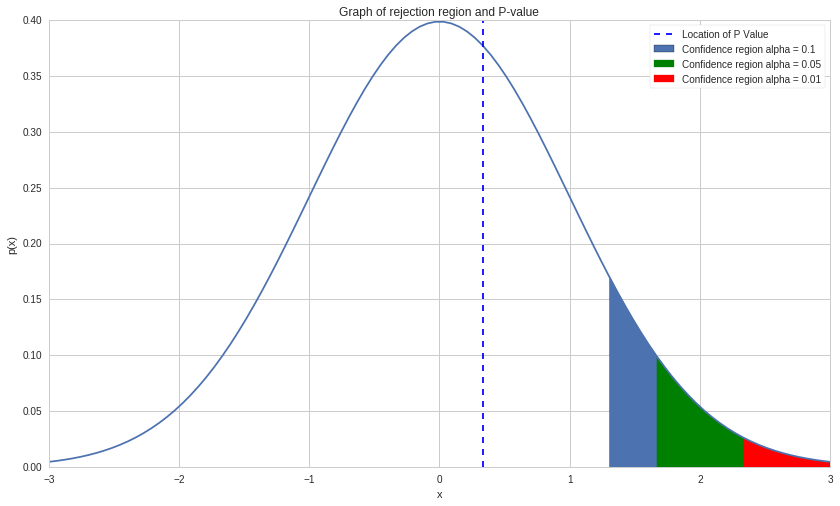

In [4]:
## Graph for visualization.

x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.282, label = 'Confidence region alpha = 0.1')
ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region alpha = 0.05', color = 'green')
ax.fill_between(x, 0, y, where = x > 2.326, label = 'Confidence region alpha = 0.01', color = 'red')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

In the graph above, we can clearly see the rejection region for all three values of $\alpha$ are bellow the found p-value.

## b. Two tailed test. 
Using the techniques laid out in lecture, verify if we can state that the returns of TSLA are equal to 0.

###### Two tail hypotheses.
- *Null hypothesis: No difference in average returns in both population, the mean **is** 0*
- *Althernative hypothesis: There is a difference in average returns of both populations, the mean **is not** 0*

In [5]:
## Finding the p-value for two tailed test. 
p_val = 2*(1 - t.cdf(test_stat, len(returns_sample_tsla) - 1))
print 'p-value is: ', p_val

p-value is:  0.670198864209


With $\alpha = 0.01$, our p-value is greater than our $\alpha$ value, we thus **fail to reject** the null hypothesis.   
With $\alpha = 0.5$, our p-value is greater than our $\alpha$ value, we thus **fail to reject** the null hypothesis.   
With $\alpha = 0.1$, our p-value is greater than our $\alpha$ value, we thus **fail to reject** the null hypothesis. 

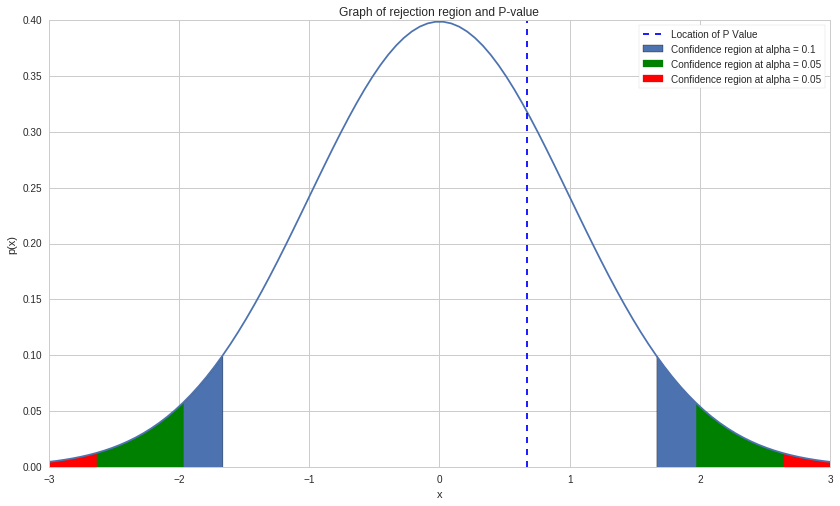

In [6]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region at alpha = 0.1')
ax.fill_between(x, 0, y, where = x < -1.645)

ax.fill_between(x, 0, y, where = x > 1.96, label = 'Confidence region at alpha = 0.05', color = 'green')
ax.fill_between(x, 0, y, where = x < -1.96, color = 'green')

ax.fill_between(x, 0, y, where = x > 2.576, label = 'Confidence region at alpha = 0.05', color='red')
ax.fill_between(x, 0, y, where = x < -2.576, color = 'red')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

----

# Exercise 2: 
## a. Critical Values. 
Find the critical values associated with $\alpha = 1\%, 5\%, 10\%$ and graph the rejection regions on a plot for a two tailed test. 

Useful formula: 
$$ f = 1 - \frac{\alpha}{2} $$ 

In order to find the z-value associated with each f value use the [z-table](http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf) here.   
*You can read more about how to read z-tables [here](http://www.dummies.com/education/math/statistics/how-to-find-probabilities-for-z-with-the-z-table/)*

In [7]:
# For alpha = 10%
alpha = 0.1
f = 1 - (alpha/2)
print 'alpha = 10%: f = ', f

# For alpha = 5%
alpha = 0.05
f = 1 - (alpha/2)
print 'alpha = 5%: f = ', f

# For alpha = 1%
alpha = 0.01
f = 1 - (alpha/2)
print 'alpha = 1%: f = ', f

alpha = 10%: f =  0.95
alpha = 5%: f =  0.975
alpha = 1%: f =  0.995


Using the z-table above, we find that for   
$\alpha = 10\%$, x = $\pm 1.645$  
$\alpha = 5\%$, x = $\pm 1.96$  
$\alpha = 1\%$, x = $\pm 2.575$  

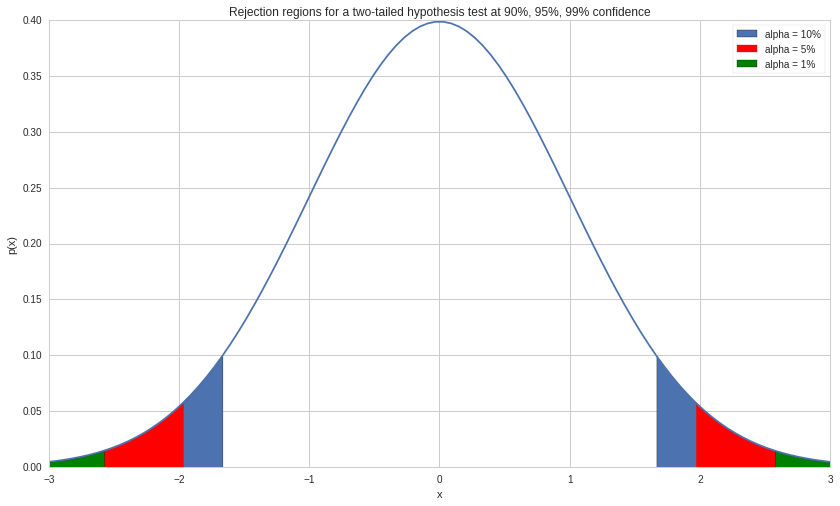

In [8]:
# Plot a standard normal distribution and mark the critical regions with shading
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)

# Value for alpha = 1%
ax.fill_between(x, 0, y, where =  x > 1.645, label = 'alpha = 10%')
ax.fill_between(x, 0, y, where = x < -1.645)

# Value for alpha = 5%
ax.fill_between(x, 0, y, where = x > 1.96, color = 'red', label = 'alpha = 5%')
ax.fill_between(x, 0, y, where = x < -1.96, color = 'red')

#Value for alpha = 10%
ax.fill_between(x, 0, y, where = x > 2.575, facecolor='green', label = 'alpha = 1%')
ax.fill_between(x, 0, y, where = x < -2.575, facecolor='green')

plt.title('Rejection regions for a two-tailed hypothesis test at 90%, 95%, 99% confidence')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

## b. Mean T-Test
Run a T-test on the SPY returns, to determine if the mean returns is 0.01.   
- Find the two critical values for a 90% two tailed $z$-test
- Use the formula above to run a t-test on the sample data.
- Conclude about the test results.

In [9]:
# Calculating Critical Values probability

alpha = 0.1
v = 1 - (alpha/2)
print v

0.95


From the previous question, we find a critical value of 1.645. 

In [10]:
data = get_pricing('SPY', start_date = '2016-01-01', end_date = '2017-01-01', fields = 'price')
returns_sample = data.pct_change()[1:]

# Running the T-test.
n = len(returns_sample)
test_statistic = ((returns_sample.mean() - 0) /
                (returns_sample.std()/np.sqrt(n)))
print 't test statistic: ', test_statistic

t test statistic:  1.05168962394


We find that
$-1.645 < 1.05 < 1.645$.
We thus conclude that we **fail to reject** our $H_0$

# c. Mean p-value test
Given the returns data above, use the p-value to determine the results of the previous hypothesis test. 

In [11]:
# Running p-value test. 

alpha = 0.1
p_val = 2 * (1 - t.cdf(test_statistic, n - 1))
print 'p-value is: ', p_val

if p_val > alpha: 
    print 'p-value is greater than our significant level, we thus fail to reject the null hypothesis.'
else: 
    print 'p-value is less than or equal to our significal level, we thus reject the null hypothesis.'

p-value is:  0.293957454918
p-value is greater than our significant level, we thus fail to reject the null hypothesis.


As we can see above, our p-value is greater than our significant level, $\alpha = 0.1$, we thus **fail to reject** the null hypothesis.

----

# Exercise 3: Multiple Variables Tests.
## a. Hypothesis testing on Means.
- State the hypothesis tests for comparing two means
- Find the test statistic along with the degrees of freedom for the following two assets. Assume variance is different (We assume XLF to be a safer buy than GS. 
- Use the [t-table](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values) to conclude about your hypothesis test. *Pick $\alpha = 10\%$*

######Useful Formulas: 
$$ t = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_p^2}{n_1} + \frac{s_p^2}{n_2})^{1/2}}$$
$$ t = \frac{\bar{X}_1 - \bar{X}_2}{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^{1/2}}$$
$$df = \frac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{(s_1^2/n_1)^2/(n_1-1) + (s_2^2/n_2)^2/(n_2-1)}$$

*note: one formula for t involves equal variance, the other does not. Use the right one given the information above*


-----------------

Answer: 
<center>
Hypothesis Tests when comparing two means: 
$$1. H_0: \mu_1 - \mu_2 = \theta_0, \ H_A: \mu_1 - \mu_2 \neq \theta_0$$
$$2. H_0: \mu_1 - \mu_2 \leq \theta_0, \ H_A: \mu_1 - \mu_2 > \theta_0$$
$$3. H_0: \mu_1 - \mu_2 \geq \theta_0, \ H_A: \mu_1 - \mu_2 < \theta_0$$
</center>

In [12]:
# Data Collection
alpha = 0.1
symbol_list = ['XLF', 'MCD']
start = '2015-01-01'
end = '2016-01-01'
pricing_sample = get_pricing(symbol_list, start_date = start, end_date = end, fields='price')
pricing_sample.columns = map(lambda x: x.symbol, pricing_sample.columns)
returns_sample = pricing_sample.pct_change()[1:]


# Sample mean values
mu_xlf, mu_gs = returns_sample.mean()
s_xlf, s_gs = returns_sample.std()
n_xlf = len(returns_sample['XLF'])
n_gs = len(returns_sample['MCD'])

test_statistic = ((mu_xlf - mu_gs) - 0)/((s_xlf**2/n_xlf) + (s_gs**2/n_gs))**0.5
df = ((s_xlf**2/n_xlf) + (s_gs**2/n_gs))**2/ \
     (((s_xlf**2 / n_xlf)**2 /(n_xlf-1))+((s_gs**2 / n_gs)**2/(n_gs-1)))

print 't test statistic: ', test_statistic
print 'Degrees of freedom (modified): ', df
print 'p-value: ', 2 * (1 - t.cdf(test_statistic, df))

t test statistic:  -1.12060529448
Degrees of freedom (modified):  496.271031856
p-value:  1.73700210188


With a confidence level of 90%, our test statistic belongs to the range -1.645, 1.645. Since our test statistic is above these values we **accept** the null hypothesis and determine that the difference between XLF and MCD returns **is** significantly different from $0$.

## b. Hypothesis Testing on Variances. 
- State the hypothesis tests for comparing two means. 
- Calculate the returns and compare their variances.
- Calculate the F-test using the variances
- Check that both values have the same degrees of freedom. 

Answer: 

$$1. H_0: \sigma_1^2 = \sigma_2^2, \ H_A: \sigma_1^2 \neq \sigma_2^2$$
$$2. H_0: \sigma_1^2 \leq \sigma_2^2, \ H_A: \sigma_1^2 > \sigma_2^2$$
$$3. H_0: \sigma_1^2 \geq \sigma_2^2, \ H_A: \sigma_1^2 < \sigma_2^2$$


In [13]:
# Data
symbol_list = ['XLF', 'MCD']
start = "2015-01-01"
end = "2016-01-01"
pricing_sample = get_pricing(symbol_list, start_date = start, end_date = end, fields = 'price')
pricing_sample.columns = map(lambda x: x.symbol, pricing_sample.columns)
returns_sample = pricing_sample.pct_change()[1:]

# Take returns from above, MCD and XLF, and compare their variances
xlf_std_dev, mcd_std_dev = returns_sample.std()
print 'XLF standard deviation is: ', xlf_std_dev
print 'MCD standard deviation is: ', mcd_std_dev

# Calculate F-test with MCD.std > XLF.std
test_statistic = (mcd_std_dev / xlf_std_dev)**2
print "F Test statistic: ", test_statistic

#degree of freedom 
df1 = len(returns_sample['XLF']) - 1
df2 = len(returns_sample['MCD']) - 1
print df1
print df2

# Calculate critical values. 
from scipy.stats import f
upper_crit_value = f.ppf(0.975, df1, df2)
lower_crit_value = f.ppf(0.025, df1, df2)
print 'Upper critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), upper_crit_value
print 'Lower critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), lower_crit_value

XLF standard deviation is:  0.0110764148949
MCD standard deviation is:  0.0120820314786
F Test statistic:  1.18982063302
250
250
Upper critical value at a = 0.05 with df1 = 250 and df2 = 250:  1.28208064948
Lower critical value at a = 0.05 with df1 = 250 and df2 = 250:  0.779982133263


We can see that our F-test statistic is bellow the Upper Critical Value, thus we **accept** the null hypothesis and **reject** the alternative and conclude that the variances of XLF and MCD indeed do **not** differ.

---

Congratulations on completing the Hypothesis Testing answer key!

As you learn more about writing trading models and the Quantopian platform, enter the daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*